# Summary of ChatGPT Conversation

It kept causing an error when I tried to get a link for our conversation, so I downloaded a pdf of the chatlog and uploaded it GitHub. Here is the link https://github.com/nehan-p/sta130/blob/main/Histograms%20with%20Plotly.pdf

Data Analysis of Fast Food Nutrition:

You shared several visualizations of calorie and sodium distributions, along with a boxplot of calories to explore trends in a fast food nutrition dataset.
I helped analyze these plots, noting that calories are concentrated between 100-500, and sodium levels have a wide range, with some items having dangerously high sodium content (up to 4000 mg). We discussed how the distribution of calories and sodium is right-skewed, with many outliers.
Gapminder Plotly Animation:

You were tasked with recreating a Plotly animation based on the Gapminder dataset (showing life expectancy vs. GDP over time).
I provided Python code using plotly.express to recreate the animated bubble chart, showing how life expectancy and GDP per capita change over time for different countries. You were encouraged to modify the style and explore customization.
Baby Names Animation:

For the next task, you needed to adjust the Gapminder-style animation to visualize baby name popularity using a different dataset, with changes in axis variables, size, color, and animation frames.
I helped you write code using plotly.express to visualize the percent change in baby name popularity by year, where name, rank, and sex were part of the analysis.
Exporting Plotly Figures as PNG:

You faced issues with exporting the Plotly figure to a PNG using kaleido. We discussed the steps to install kaleido and use it to save the figure as a PNG. You encountered issues, and we explored possible fixes, including installing the package and removing the unnecessary renderer argument from plt.show() when using Matplotlib.
Matplotlib Plot Issue:

You encountered an error with the renderer="png" argument in plt.show(). I explained that Matplotlib doesn't use this argument and showed you how to properly save a Matplotlib figure using plt.savefig() and display it without specifying a renderer.

# Question 1

In [5]:
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00


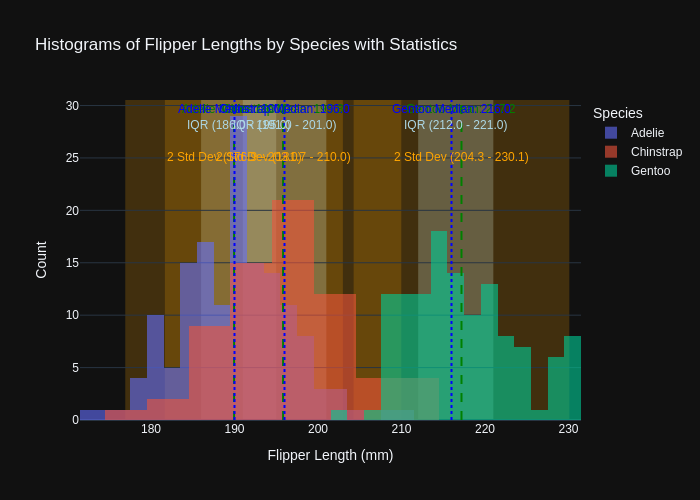

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import kaleido

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Filter out rows with missing values
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Create an empty figure
fig = go.Figure()

# Loop through each species and create the histograms
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    flipper_lengths = species_data['flipper_length_mm']

    # Calculate the statistics
    mean_val = np.mean(flipper_lengths)
    median_val = np.median(flipper_lengths)
    std_val = np.std(flipper_lengths)
    q1_val = np.percentile(flipper_lengths, 25)
    q3_val = np.percentile(flipper_lengths, 75)

    # Add the histogram for this species
    fig.add_trace(go.Histogram(x=flipper_lengths, name=f'{species}', opacity=0.6))

    # Add vertical lines for mean and median with labels
    fig.add_vline(x=mean_val, line_width=2, line_dash="dash", line_color="green")
    fig.add_annotation(x=mean_val, y=1, text=f'{species} Mean: {mean_val:.1f}', showarrow=False, yref="paper", font=dict(color="green"))

    fig.add_vline(x=median_val, line_width=2, line_dash="dot", line_color="blue")
    fig.add_annotation(x=median_val, y=1, text=f'{species} Median: {median_val:.1f}', showarrow=False, yref="paper", font=dict(color="blue"))

    # Add a rectangle for the IQR with label
    fig.add_shape(
        type="rect",
        x0=q1_val, x1=q3_val, y0=0, y1=1,
        fillcolor="lightblue",
        opacity=0.3,
        layer="below",
        line_width=0,
        xref="x", yref="paper"
    )
    fig.add_annotation(x=(q1_val + q3_val) / 2, y=0.95, text=f'IQR ({q1_val:.1f} - {q3_val:.1f})', showarrow=False, yref="paper", font=dict(color="lightblue"))

    # Add a rectangle for 2 standard deviations with label
    fig.add_shape(
        type="rect",
        x0=mean_val - 2*std_val, x1=mean_val + 2*std_val, y0=0, y1=1,
        fillcolor="orange",
        opacity=0.2,
        layer="below",
        line_width=0,
        xref="x", yref="paper"
    )
    fig.add_annotation(x=mean_val, y=0.85, text=f'2 Std Dev ({mean_val - 2*std_val:.1f} - {mean_val + 2*std_val:.1f})', showarrow=False, yref="paper", font=dict(color="orange"))

# Update the layout
fig.update_layout(
    title="Histograms of Flipper Lengths by Species with Statistics",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    template="plotly_dark",  # Optional dark theme
    legend_title="Species"
)

# Show the figure
fig.show(renderer="png", engine="kaleido")  # Use


# Question 2

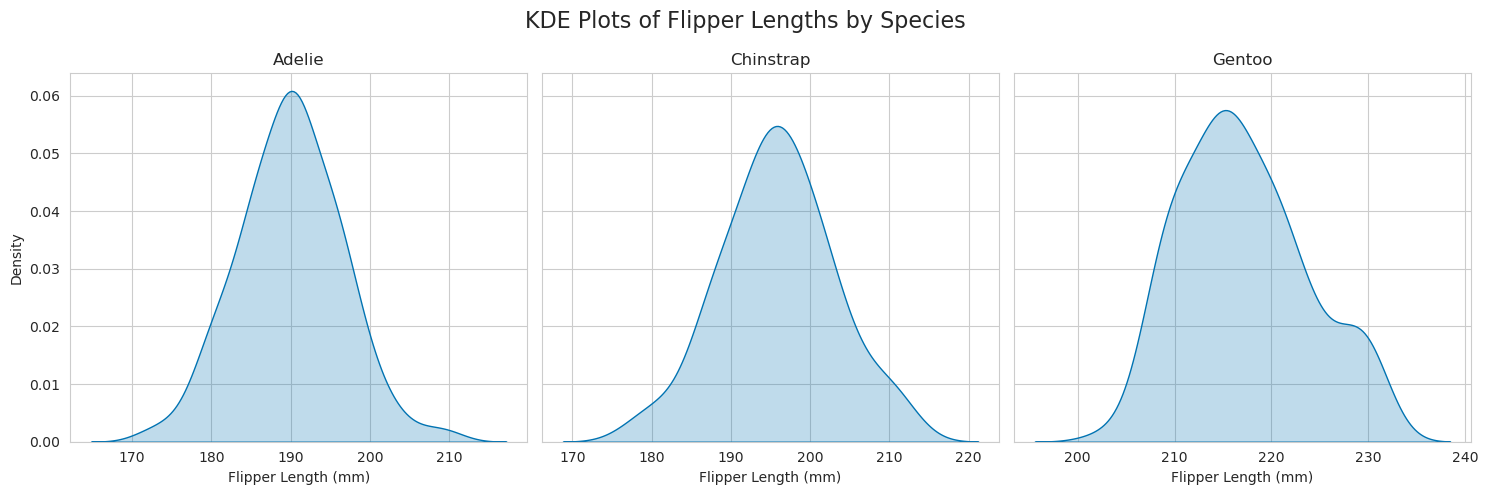

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Filter out rows with missing values in the flipper_length_mm column
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Set the Seaborn style and theme for the plots
sns.set_style("whitegrid")  # You can also use "dark", "white", etc.
sns.set_palette("colorblind")  # This sets the color palette

# Create a figure with 3 subplots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# List of unique species
species_list = penguins['species'].unique()

# Loop through each species and create a KDE plot on a separate subplot
for i, species in enumerate(species_list):
    sns.kdeplot(
        data=penguins[penguins['species'] == species],
        x="flipper_length_mm",
        fill=True,
        ax=axes[i]
    )
    axes[i].set_title(f'{species}')  # Set title as the species name
    axes[i].set_xlabel("Flipper Length (mm)")  # Set the x-axis label

# Set the overall title for the figure
fig.suptitle("KDE Plots of Flipper Lengths by Species", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


# Question 3

After talking with Chat and understanding the uses and benefits, and disadvantages of the different data visualisation methods, my preference is the histogram.

My main point for my rationale is the simplicity of the histogram.  Although the other methods may provide a better overall view of certain aspects of the data, the histogram is excellent at conveying the overall idea of the dataset.  Such as, the way it is able to easily show the overall distribution of the data through its bins, and it is easy to compare the frequency or the overall distribution such as normal, bimodal, etc.  Also, histograms work well for all sizes of data, small or large, and they can be a detailed or as generalized as you want.  Finaly, histograms show the data without artifical smoothing that can be present in KDEs or the lack of detailed description of the data in boxplots.

# Question 4

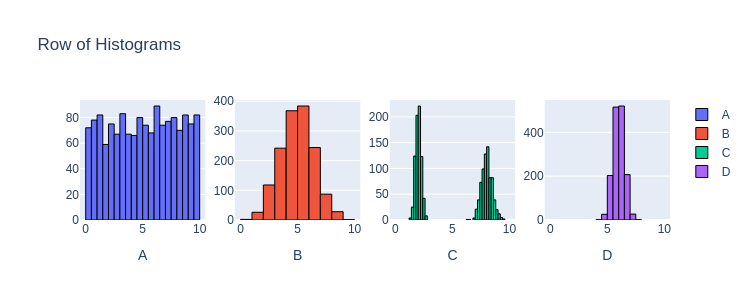

In [5]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Dataset B and D have similar variances and means.  We can see that the mean is around 5 and there are fewer values around the edge, indicating a similar variance.
2. Dataset B and C seem to have similar means, again around the value of 5.  But their variance is a lot different as B is quite spread out and C is closer to a bimodal distribution.
3. Dataset C and D have similar variances, as they are both concentrated in very small spots.  But their mean looks to be different, as C seems to be centered lower on the x-axis compared to D.
4. Dataset A and C have different variances, as A is much more evenly spread out and C is closer to being bimodal.  Because of this, they also have different means as A is quite uniform compared to a lower center on C.

# Question 5

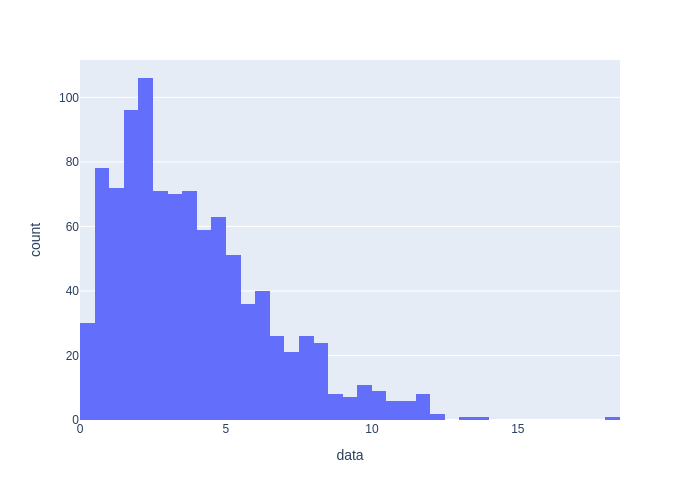

Mean: 3.8805353565776253, Median: 3.351426107104039


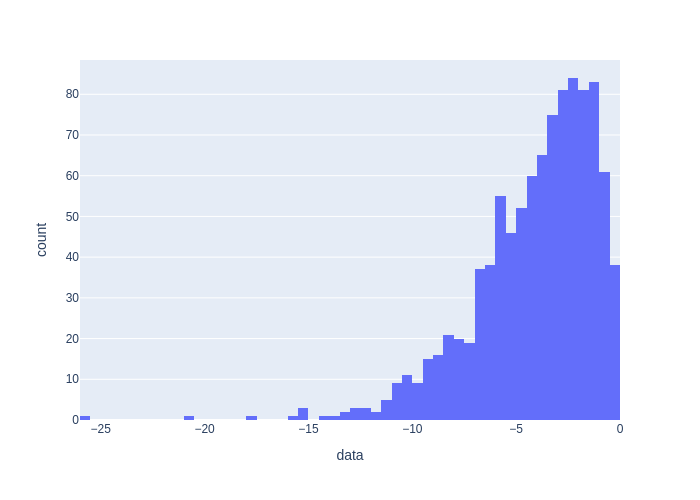

Mean: -4.127123069924612, Median: -3.4854771477589317


In [7]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  # Import plotly express

# Generate right-skewed data using a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram of the data using Plotly
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# You can display the plot using fig1.show() if you are running it in a notebook or script
fig1.show(renderer="png")

# Calculate the mean and median
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)  # median

print(f"Mean: {mean_sample1}, Median: {median_sample1}")

# Generate left-skewed data by negating the gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram of the left-skewed data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

# Calculate the mean and median for the left-skewed data
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, 0.5)  # median

print(f"Mean: {mean_sample2}, Median: {median_sample2}")



The relationship between mean and median and the skewness of a histogram is simple.

When the mean is less than the median, the histogram is left-skewed since the mean gets effected by the lower outliers, but the median is still more central relative to the center of the dataset.

On the contrary, when the mean is higher than the median, the histogram is right-skewed since the mean gets effected by the higher outliers.  Again, the median is lower because is more central relative to the center of the dataset.

Below, you can see the mean and median overlayed on the histograms.  Specifically, you can see how the mean and median are relative to each other.

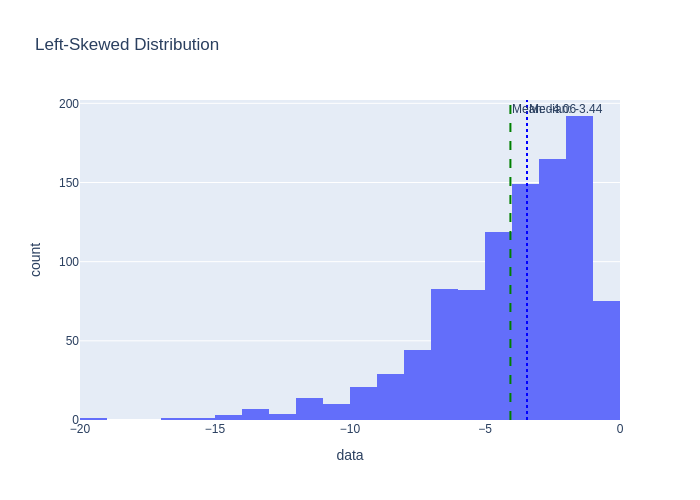

In [8]:
import plotly.graph_objects as go

# Generate right-skewed data using a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram with mean and median for right-skewed data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", nbins=30, title="Right-Skewed Distribution")
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)

# Add vertical lines for mean and median
fig1.add_vline(x=mean_sample1, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean_sample1:.2f}")
fig1.add_vline(x=median_sample1, line_dash="dot", line_color="blue", annotation_text=f"Median: {median_sample1:.2f}")

fig1.show()

# Generate left-skewed data using the negative gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram with mean and median for left-skewed data
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", nbins=30, title="Left-Skewed Distribution")
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, 0.5)

# Add vertical lines for mean and median
fig2.add_vline(x=mean_sample2, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean_sample2:.2f}")
fig2.add_vline(x=median_sample2, line_dash="dot", line_color="blue", annotation_text=f"Median: {median_sample2:.2f}")

fig2.show(renderer="png")


Next, KDEs to reinforce the idea of how its skewed on a certain side.

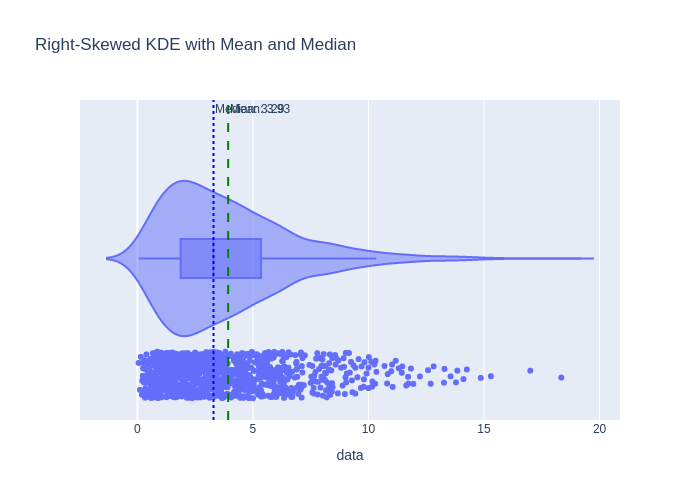

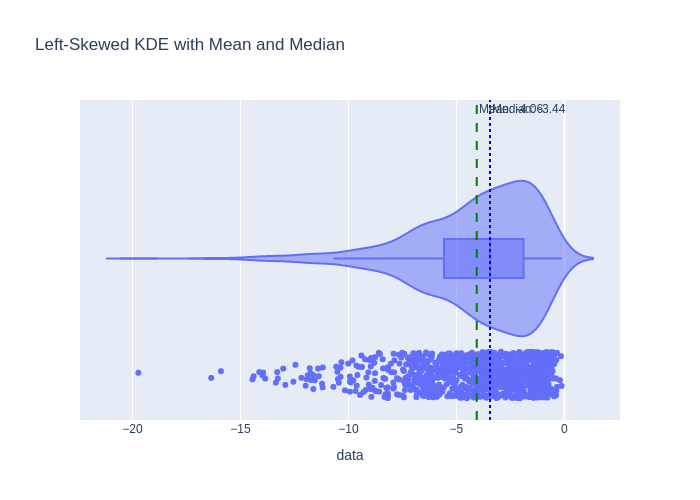

In [10]:
# KDE plot for right-skewed data
fig3 = px.violin(pd.DataFrame({'data': sample1}), x="data", box=True, points="all", title="Right-Skewed KDE with Mean and Median")
fig3.add_vline(x=mean_sample1, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean_sample1:.2f}")
fig3.add_vline(x=median_sample1, line_dash="dot", line_color="blue", annotation_text=f"Median: {median_sample1:.2f}")
fig3.show(renderer="png")

# KDE plot for left-skewed data
fig4 = px.violin(pd.DataFrame({'data': sample2}), x="data", box=True, points="all", title="Left-Skewed KDE with Mean and Median")
fig4.add_vline(x=mean_sample2, line_dash="dash", line_color="green", annotation_text=f"Mean: {mean_sample2:.2f}")
fig4.add_vline(x=median_sample2, line_dash="dot", line_color="blue", annotation_text=f"Median: {median_sample2:.2f}")
fig4.show(renderer="png")


Finally, we can see below how side by side the skewness differs due to the different mean and medians.

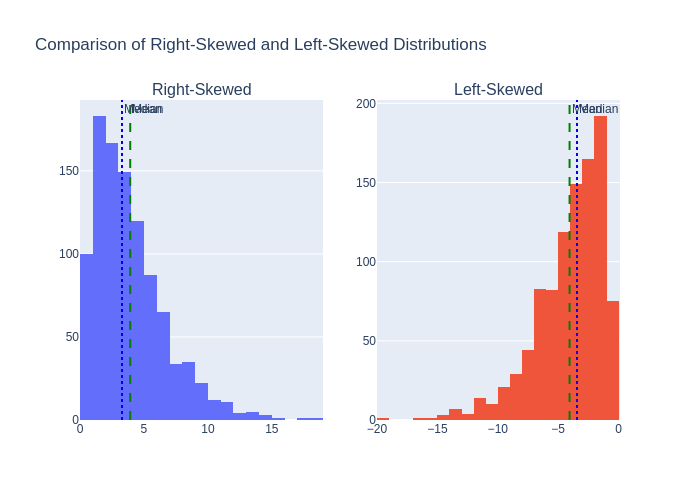

In [11]:
from plotly.subplots import make_subplots

# Create a subplot figure with two histograms
fig5 = make_subplots(rows=1, cols=2, subplot_titles=("Right-Skewed", "Left-Skewed"))

# Right-skewed distribution in the first subplot
fig5.add_trace(go.Histogram(x=sample1, nbinsx=30, name="Right-Skewed"), row=1, col=1)
fig5.add_vline(x=mean_sample1, line_dash="dash", line_color="green", annotation_text="Mean", row=1, col=1)
fig5.add_vline(x=median_sample1, line_dash="dot", line_color="blue", annotation_text="Median", row=1, col=1)

# Left-skewed distribution in the second subplot
fig5.add_trace(go.Histogram(x=sample2, nbinsx=30, name="Left-Skewed"), row=1, col=2)
fig5.add_vline(x=mean_sample2, line_dash="dash", line_color="green", annotation_text="Mean", row=1, col=2)
fig5.add_vline(x=median_sample2, line_dash="dot", line_color="blue", annotation_text="Median", row=1, col=2)

# Update the layout
fig5.update_layout(title_text="Comparison of Right-Skewed and Left-Skewed Distributions", showlegend=False)
fig5.show(renderer="png")


# Question 6

In [6]:
import pandas as pd

# Load the dataset (example: fast food nutrition data)
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Check the first few rows of the dataset
df.head()

# View the column names
df.columns


Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')

In [8]:
# Summary statistics for calories, total fat, sodium, sugar, and protein
df[['calories', 'total fat (g)', 'sodium (mg)', 'sugars (g)', 'protein (g)']].describe()



,calories,sodium (mg),sugars (g),protein (g)
count,750.000000,637.00000,637.000000,750.000000
mean,296.149333,361.55416,25.718995,11.398400
std,209.034366,580.64465,24.530455,11.119111
min,0.000000,0.00000,0.000000,0.000000
25%,150.000000,5.00000,5.000000,3.000000
50%,260.000000,80.00000,18.000000,9.000000
75%,410.000000,480.00000,41.000000,16.000000
max,1880.000000,3930.00000,128.000000,118.000000


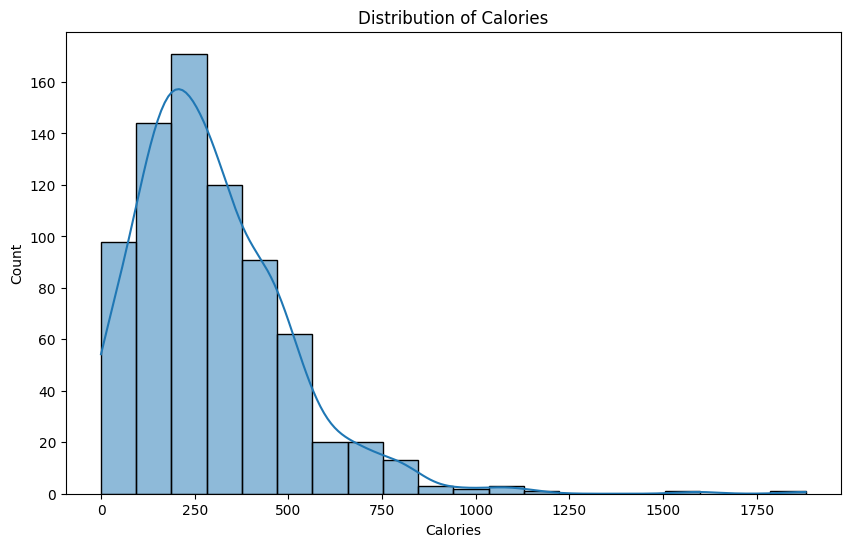

In [10]:
# Histogram: Calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=20, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()


Most fast-food items have calorie counts between 100-500, with a heavy concentration around 250 calories. However, there are some items with extremely high calorie counts (above 1000 calories), which can significantly impact daily intake.

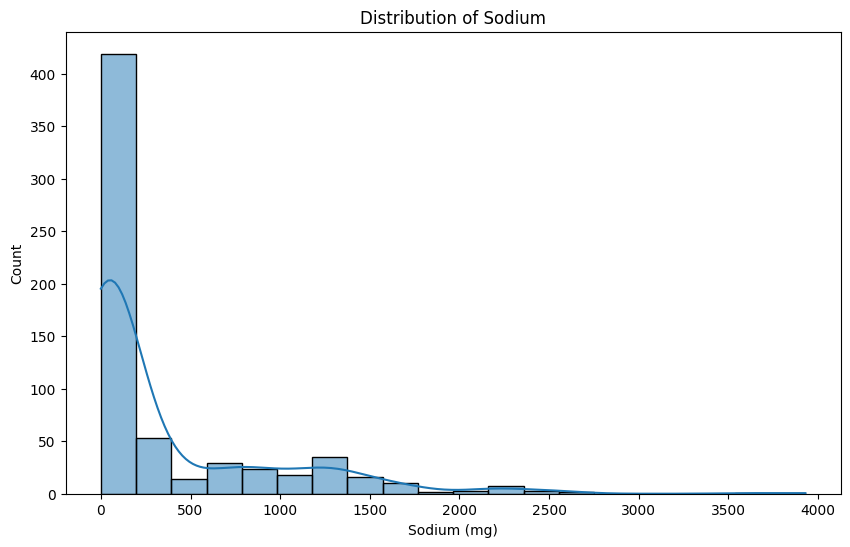

In [11]:
# Histogram: Sodium
plt.figure(figsize=(10, 6))
sns.histplot(df['sodium (mg)'], bins=20, kde=True)
plt.title('Distribution of Sodium')
plt.xlabel('Sodium (mg)')
plt.ylabel('Count')
plt.show()


Sodium levels in fast-food items vary dramatically. While most items are within acceptable ranges, there are some outliers with dangerously high sodium levels (up to 4000 mg), which could pose health risks for individuals monitoring their sodium intake.

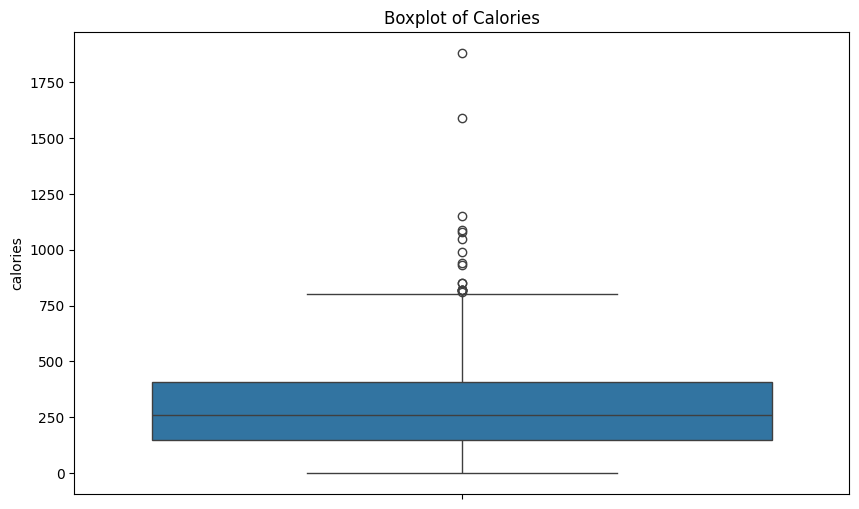

In [12]:
# Boxplot for identifying outliers in calories
plt.figure(figsize=(10, 6))
sns.boxplot(y='calories', data=df)
plt.title('Boxplot of Calories')
plt.show()


The presence of outliers in both calorie and sodium distributions suggests that while many fast-food items are designed to be moderate, there are some extreme items that push the boundaries in terms of both caloric and sodium content, potentially making them unhealthy.

# Question 7

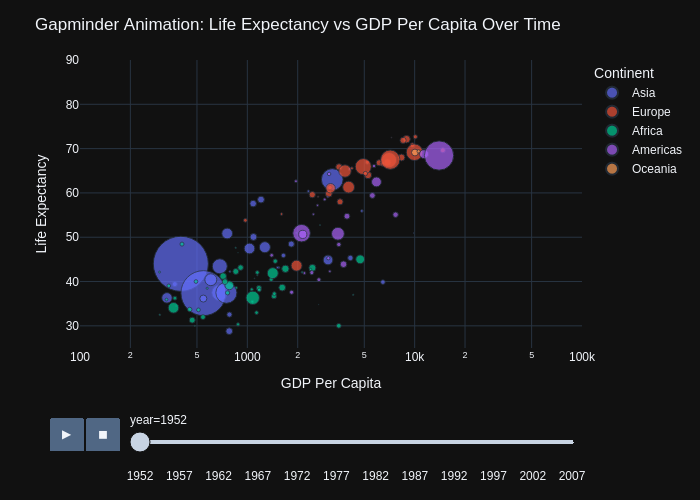

In [12]:
import plotly.express as px

# Load the gapminder dataset from Plotly
gapminder = px.data.gapminder()

# Create the animated scatter plot
fig = px.scatter(gapminder,
                 x="gdpPercap",
                 y="lifeExp",
                 animation_frame="year",
                 animation_group="country",
                 size="pop",
                 color="continent",
                 hover_name="country",
                 log_x=True,
                 size_max=60,
                 range_x=[100,100000],
                 range_y=[25,90])

# Update layout for better appearance
fig.update_layout(title="Gapminder Animation: Life Expectancy vs GDP Per Capita Over Time",
                  xaxis_title="GDP Per Capita",
                  yaxis_title="Life Expectancy",
                  legend_title="Continent",
                  template="plotly_dark")  # Optional: dark theme

# Show the figure
fig.show(renderer="png")


# Question 8 

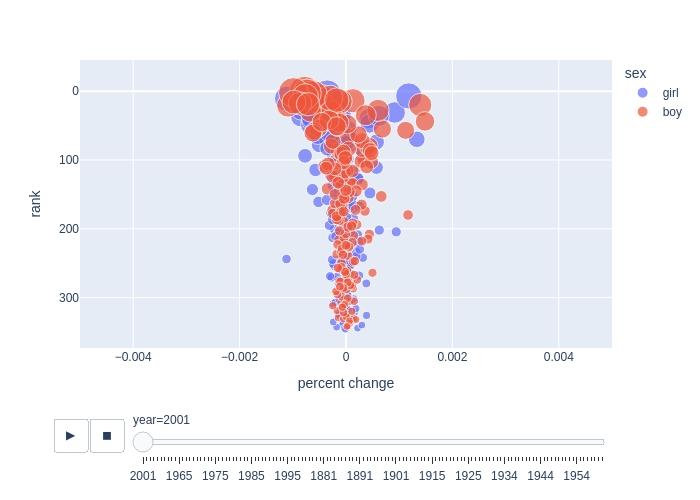

In [13]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Create a combined name+sex column to distinguish between identical boy and girl names
bn['name'] = bn['name'] + " " + bn['sex']

# Create a rank column based on the 'percent' for each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the values by name and year
bn = bn.sort_values(['name', 'year'])

# Create a 'percent change' column to capture changes in popularity from one year to the next
bn['percent change'] = bn.groupby('name')['percent'].diff()

# Remove NaN values for percent change
bn = bn.dropna(subset=['percent change'])

# Restrict to common names (those with a percent higher than a small threshold)
bn = bn[bn['percent'] > 0.001]

# Create the scatter plot with the requested settings
fig = px.scatter(bn,
                 x='percent change',
                 y='rank',
                 size='percent',
                 color='sex',
                 animation_frame='year',
                 animation_group='name',
                 hover_name='name',
                 size_max=50,
                 range_x=[-0.005, 0.005])

# Reverse the y-axis to put rank 1 on top
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")
